In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import dtale
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
%matplotlib inline

Data Cleaning
-

In [3]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)
    except:
        return ''
def convert_dtypea(x):
    if not x:
        return ''
    try:
        return int(x)
    except:
        return ''
    
smile = pd.read_csv('../data/Smileon.2021.10.17.csv', skiprows=2, header=0, encoding='latin-1', converters={
     'LinkedToCallReportNum':convert_dtype,'ThirdPartyStateProvince':convert_dtype, 'FeedbackFromPhoneWorkerName':convert_dtype,
'SMILE ON 60+ Demographic Information - # of People in Household':convert_dtypea, 'Birth Year':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 2393 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 2950 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 4342 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 7140 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 7320 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - Lab Assist narrative':convert_dtype, 'SMILE ON 60+ Case Management Information - What is the outcome for the client?':convert_dtype,
'SMILE ON 60+ Case Management Information - Dental Clinic':convert_dtype})

In [4]:
df = smile

In [5]:
df = df.drop(columns = 'SMILE ON 60+ Base-line Oral and Conditions Questions - Dental Clinic')
df = df.drop(columns = 'SMILE ON 60+ Case Management Information - Dental Clinic')
df = df.drop(columns = 'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?')
df = df.drop(columns = 'SMILE ON 60+ Oral Care Encounter - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)')

In [6]:
##used this for general data cleaning
df.columns = [x.replace('SMILE ON 60+ Demographic Information -','') for x in df.columns]
df.columns = [x.replace(' - Quantity','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Screening -','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Base-line Oral and Conditions Questions - ','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Case Management Information - ','') for x in df.columns]
df.columns = [x.replace('(Select all that apply)','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Case Management Information - ','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Demographic Information - ','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Screening -','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Clinic Information - ','') for x in df.columns]

In [7]:
df_clean = df.drop(columns = ['ReportVersion','LinkedToCallReportNum','CallDateAndTimeEnd','CallLength',
            'PhoneWorkerNum','WasRealCall','WasHangup','WasSexCall','WasWrongNumber',
            'WasPrankCall','WasSilentCall','GeoCode','GeoAssignment','CensusDivision','CensusTrack',
            'CensusReportingArea','211Region','PhoneType','ThirdPartyName','ThirdPartyOrganization',
            'ThirdPartyPhoneNumber','ThirdPartyAddress','ThirdPartyCity','ThirdPartyCounty',
            'ThirdPartyStateProvince','ThirdPartyPostalCode','Narrative','VolunteerComments',
            'Feedback','CallersFeedback','TextField2','TextField3','TextField4','TextField5',
            'TextField6','TextField7','TextField8','TextField9','TextField10','EnteredByWorkerNum',
            'EnteredOn','Supervisor','Reviewed','FeedbackStatus','FeedbackFromPhoneWorkerNum',
             'FeedbackFromPhoneWorkerName','ReferralsMade','IPAddress','OrgNum','VolIdentifier',
            'SMILE ON 60+ Verification of Eligibility - Verification Date',
            'Did the client commit to referral?','Did you help in these other areas?',
             'Transportation Barriers','Action: Upload Before Picture on Finish Tab','Was initial appointment made?',
            'Was initial transportation assistance or referral provided?',
            'SMILE ON 60+ Oral Care Encounter - Action: Upload After Picture on Finish Tab',
            'SMILE ON 60+ Presumptive Eligibility - Dental Insurance?','SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?',
            'SMILE ON 60+ Site Information - Enroller ID',
            'SMILE ON 60+ Site Information - Enroller Location',
            'SMILE ON 60+ Verification of Eligibility - Transportation Arranged','SMILE ON 60+ Verification of Eligibility - Verification of Eligibility',
            'SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab',' Root Fragments',' Need for Periodontal Care',' Suspicious Soft Tissue Lesions',
            ' Untreated Decay',' What other assistance programs are you on?',' Preferred Language/Language Needed',
            ' How did you first hear about the SMILE ON 60+ program?','SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter? ',
            'What is the next step for clients encounter?'])

In [8]:
df_clean.columns = [x.replace('SMILE ON 60+ Oral Care Encounter -','') for x in df_clean.columns]
df_clean.columns = [x.replace('Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)','social_6_restored') for x in df_clean.columns]
df_clean.columns = [x.replace('SMILE ON 60+ Presumptive Eligibility -','') for x in df_clean.columns]
df_clean.columns = [x.replace('What barriers have kept you from finding a consistent dental home?','barriers') for x in df_clean.columns]
df_clean.columns = [x.replace('How would you describe the condition of your mouth and teeth?','mouth_condition') for x in df_clean.columns]
df_clean.columns = [x.replace('Have you ever felt that the appearance of your mouth and teeth affected your quality of life?','teeth_affect_qualifty_of_life') for x in df_clean.columns]
df_clean.columns = [x.replace('No Code - ','') for x in df_clean.columns]
df_clean.columns = [x.replace('Experienced any problems related to mouth/teeth during past 12 months?','problems_past_year') for x in df_clean.columns]
df_clean.columns = [x.replace('How often do you brush your teeth?','brush_frequency') for x in df_clean.columns]


In [9]:
df_clean = df_clean[df_clean.CallerNum >= 0]

Subgroup the Data by Treatment Urgency Column. Merged to keep all records for patients labeled in any  3 subgroups at any point
-
Urgent Care - within next week-pain or infection

No obvious problem

Early care-within next several weeks


In [10]:
urgent = df_clean.loc[df_clean[' Treatment Urgency'] == 'Urgent Care - within next week-pain or infection']
urgent = urgent.filter(['CallReportNum','CallerNum'])

In [11]:
no_problem = df_clean.loc[df_clean[' Treatment Urgency'] == 'No obvious problem']
no_problem = no_problem.filter(['CallReportNum','CallerNum'])

In [12]:
early_care = df_clean.loc[df_clean[' Treatment Urgency'] == 'Early care-within next several weeks']
early_care = early_care.filter(['CallReportNum','CallerNum'])

In [13]:
urgent_merged = df_clean.merge(urgent,how='inner',on='CallerNum')

In [14]:
no_problem_merged = df_clean.merge(no_problem,how='inner',on='CallerNum')

In [15]:
early_care_merged = df_clean.merge(early_care,how='inner',on='CallerNum')

Create dummy variables for; was treatment plan develped,is treatment plan completed, was social 6 restored
-
use these to quantify number of completed treatment plans vs on-going treatment plans

In [16]:
created_dummy = pd.get_dummies(df_clean['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'])
created_dummy = created_dummy.rename(columns = {'No':'not_created','Yes':'created'}).astype(int)

In [17]:
completed_dummy = pd.get_dummies(df_clean['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'])
completed_dummy = completed_dummy.rename(columns = {'No':'not_completed','Yes':'completed'}).astype(int)

In [18]:
social_dummy = pd.get_dummies(df_clean['SMILE ON 60+ Treatment Plan - social_6_restored'])
social_dummy = social_dummy.rename(columns = {'No':'not_restored','Yes':'restored'}).astype(int)

In [19]:
df_clean = pd.concat([df_clean,created_dummy],axis=1)

In [20]:
df_clean = pd.concat([df_clean,completed_dummy],axis=1)

In [21]:
df_clean = pd.concat([df_clean,social_dummy],axis=1)

In [22]:
df_grouped = df_clean.groupby('CallerNum').agg('sum')

In [23]:
#difference between incomplete and created shows unfinished/unsuccessful treatment plans
df_grouped['incomplete'] = df_grouped['created'] - df_grouped['completed']

In [24]:
df_grouped.incomplete.value_counts()

 0     5201
 1     1810
 2      990
 3      731
 4      508
 5      363
 6      274
 7      216
-1      177
 8      121
 9       76
 10      75
 11      42
 12      35
-2       29
 13      20
 14       8
-3        8
 16       5
 15       5
-4        4
 19       2
 18       2
 23       2
 20       1
 21       1
-8        1
 30       1
-5        1
Name: incomplete, dtype: int64

apply process to each of 3 subgroups
-

Urgent

In [25]:
urgent_created_dummy = pd.get_dummies(urgent_merged['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'])
urgent_created_dummy = urgent_created_dummy.rename(columns = {'No':'not_created','Yes':'created'}).astype(int)
urgent_completed_dummy = pd.get_dummies(urgent_merged['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'])
urgent_completed_dummy = urgent_completed_dummy.rename(columns = {'No':'not_completed','Yes':'completed'}).astype(int)
urgent_social_dummy = pd.get_dummies(urgent_merged['SMILE ON 60+ Treatment Plan - social_6_restored'])
urgent_social_dummy = urgent_social_dummy.rename(columns = {'No':'not_restored','Yes':'restored'}).astype(int)
urgent_merged = pd.concat([urgent_merged,urgent_created_dummy],axis=1)
urgent_merged = pd.concat([urgent_merged,urgent_completed_dummy],axis=1)
urgent_merged = pd.concat([urgent_merged,urgent_social_dummy],axis=1)

In [26]:
urgent_grouped = urgent_merged.groupby('CallerNum').agg('sum')

In [27]:
#difference between incomplete and created shows unfinished/unsuccessful treatment plans
urgent_grouped['incomplete'] = urgent_grouped['created'] - urgent_grouped['completed']

In [28]:
urgent_grouped.incomplete.value_counts()

 1     105
 0      82
 2      61
 3      50
 4      31
 6      28
 5      26
 7      24
 10     15
 8      12
 11      9
 9       9
-1       8
 12      7
 13      4
-2       3
 15      2
 19      2
 14      1
 16      1
 20      1
 24      1
 22      1
Name: incomplete, dtype: int64

no problem

In [29]:
no_problem_created_dummy = pd.get_dummies(no_problem_merged['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'])
no_problem_created_dummy = no_problem_created_dummy.rename(columns = {'No':'not_created','Yes':'created'}).astype(int)
no_problem_completed_dummy = pd.get_dummies(no_problem_merged['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'])
no_problem_completed_dummy = no_problem_completed_dummy.rename(columns = {'No':'not_completed','Yes':'completed'}).astype(int)
no_problem_social_dummy = pd.get_dummies(no_problem_merged['SMILE ON 60+ Treatment Plan - social_6_restored'])
no_problem_social_dummy = no_problem_social_dummy.rename(columns = {'No':'not_restored','Yes':'restored'}).astype(int)
no_problem_merged = pd.concat([no_problem_merged,no_problem_created_dummy],axis=1)
no_problem_merged = pd.concat([no_problem_merged,no_problem_completed_dummy],axis=1)
no_problem_merged = pd.concat([no_problem_merged,no_problem_social_dummy],axis=1)

In [30]:
no_problem_grouped = no_problem_merged.groupby('CallerNum').agg('sum')

In [31]:
#difference between incomplete and created shows unfinished/unsuccessful treatment plans
no_problem_grouped['incomplete'] = no_problem_grouped['created'] - no_problem_grouped['completed']

In [32]:
no_problem_grouped.incomplete.value_counts()

 0     237
 1     223
 2     175
 3      87
 4      79
 6      61
 5      49
-1      46
 8      31
 7      29
 12     20
 10     15
-2      13
 9      10
 11      8
 13      6
 20      6
 16      5
-4       4
 14      4
 21      3
 18      2
-3       2
-6       2
 15      2
 19      1
 24      1
 36      1
-10      1
-12      1
Name: incomplete, dtype: int64

Early care

In [33]:
early_created_dummy = pd.get_dummies(early_care_merged['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'])
early_created_dummy = early_created_dummy.rename(columns = {'No':'not_created','Yes':'created'}).astype(int)
early_completed_dummy = pd.get_dummies(early_care_merged['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'])
early_completed_dummy = early_completed_dummy.rename(columns = {'No':'not_completed','Yes':'completed'}).astype(int)
early_social_dummy = pd.get_dummies(early_care_merged['SMILE ON 60+ Treatment Plan - social_6_restored'])
early_social_dummy = early_social_dummy.rename(columns = {'No':'not_restored','Yes':'restored'}).astype(int)
early_care_merged = pd.concat([early_care_merged,early_created_dummy],axis=1)
early_care_merged = pd.concat([early_care_merged,early_completed_dummy],axis=1)
early_care_merged = pd.concat([early_care_merged,early_social_dummy],axis=1)

In [34]:
early_care_grouped = early_care_merged.groupby('CallerNum').agg('sum')

In [35]:
#difference between incomplete and created shows unfinished/unsuccessful treatment plans
early_care_grouped['incomplete'] = early_care_grouped['created'] - early_care_grouped['completed']

In [36]:
early_care_grouped.incomplete.value_counts()

 1     998
 2     588
 0     558
 3     387
 4     356
 6     243
 5     192
 8     137
 7     114
 10     76
-1      72
 9      61
 12     53
 14     29
-2      21
 11     19
 18     18
 16     18
 20     17
 15     11
 21     11
 24      9
 22      8
 13      7
-3       6
 28      5
 36      4
 26      3
 33      3
 30      2
 19      2
-4       2
 27      2
 60      1
 48      1
 46      1
 42      1
 40      1
 32      1
-8       1
-6       1
 39      1
 69      1
Name: incomplete, dtype: int64

In [37]:
urgent_grouped.head()

,CallReportNum_x,PostalCode,1351,1354,2140,2150,2160,2161,220,230,2330,2331,2332,2335,2390,2391,2392,2394,2915,2920,2933,2940,2954,2955,2980,3220,4341,6930,6980,7111,7210,7220,7230,7240,7241,7250,7261,7285,7286,7310,7311,7321,7410,7411,7412,7413,7414,7415,7440,7450,7451,7460,7461,7471,7510,7511,7970 - Mandibular Quantity,7970 - Maxillary Quantity,7971,7972,9110,9951,Denture Step Mandibular Quantity,Denture Step Maxillary Quantity,Is the treatment plan completed?,Was a treatment plan developed?,# of Lower Natural Teeth,# of Upper Natural Teeth,CallReportNum_y,not_created,created,not_completed,completed,not_restored,restored,incomplete
CallerNum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2384106,859604464,519820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,773696742,0,4,2,1,2,1,3
2385168,504248811,334170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,11.0,498174678,0,1,0,1,0,1,0
2386075,587503301,371380.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,555044020,0,2,0,1,0,1,1
2387627,504018763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,497883582,0,1,0,1,0,1,0
2390783,1394984052,779415.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,1161769539,1,9,3,4,4,5,5


Check for procedural differences between subgroups
-

urgent

In [38]:
urgent_sum = urgent_grouped.agg([sum])
urgent_sum = urgent_sum.iloc[:,3:62]
urgent_sumT = urgent_sum.T
urgent_sumT = urgent_sumT.loc[urgent_sumT['sum']>0]
urgent_sumT = urgent_sumT.sort_values(by='sum',ascending = False)
urgent_sumT = urgent_sumT.rename(columns={'sum':'Urgent_pct'})
urgent_sumT['Urgent_pct'] = (urgent_sumT['Urgent_pct']/urgent_sumT['Urgent_pct'].sum())*100

In [39]:
urgent_sumT.head()

,Urgent_pct
1354,15.440878
7210,15.400244
230,12.515238
4341,10.646079
7250,9.548964


<AxesSubplot:>

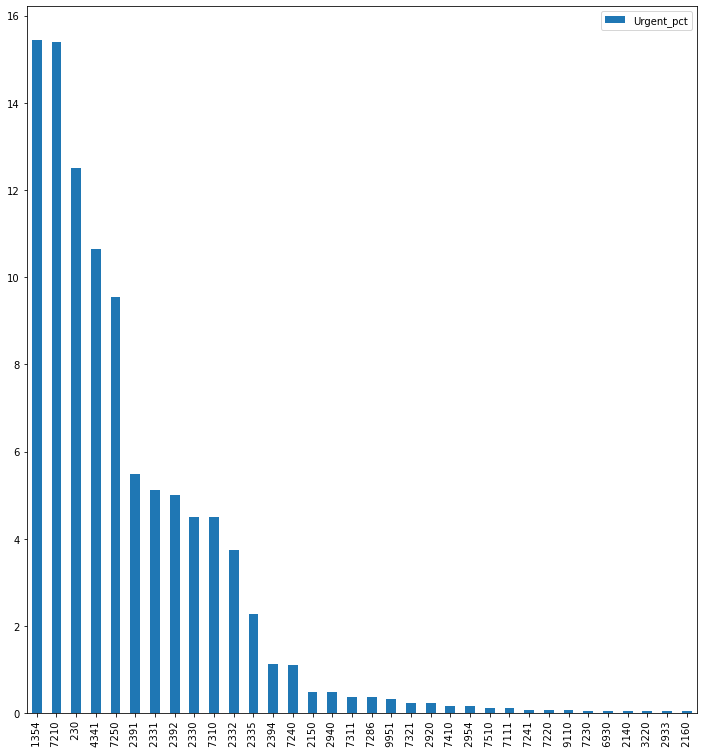

In [40]:
urgent_sumT.plot.bar(figsize = (12,13))

no problem

In [41]:
no_problem_sum = no_problem_grouped.agg([sum])
no_problem_sum = no_problem_sum.iloc[:,3:62]
no_problem_sumT = no_problem_sum.T
no_problem_sumT = no_problem_sumT.loc[no_problem_sumT['sum']>0]
no_problem_sumT = no_problem_sumT.sort_values(by='sum',ascending = False)
no_problem_sumT = no_problem_sumT.rename(columns={'sum':'no_problem_pct'})
no_problem_sumT['no_problem_pct'] = (no_problem_sumT['no_problem_pct']/no_problem_sumT['no_problem_pct'].sum())*100

<AxesSubplot:>

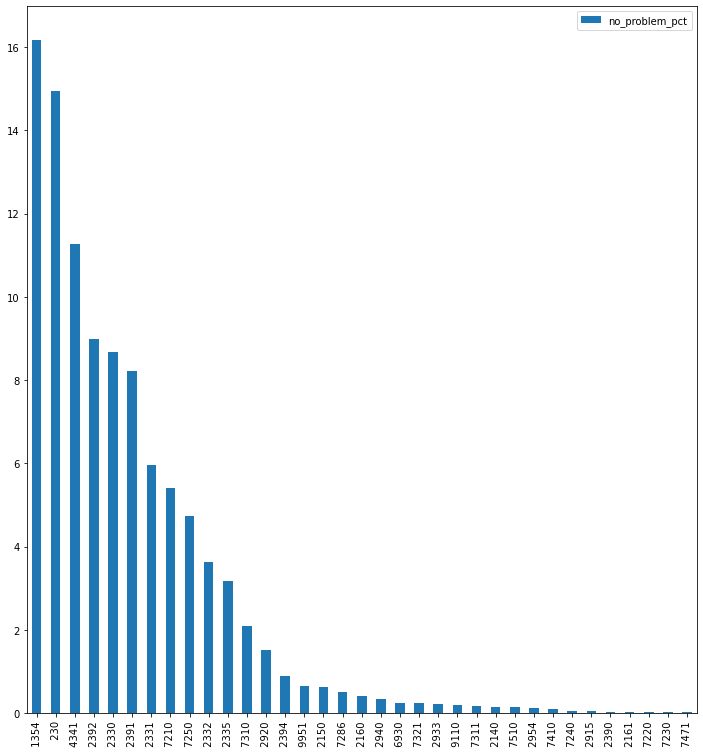

In [42]:
no_problem_sumT.plot.bar(figsize = (12,13))

early

In [43]:
early_care_sum = early_care_grouped.agg([sum])
early_care_sum = early_care_sum.iloc[:,3:62]
early_care_sumT = early_care_sum.T
early_care_sumT = early_care_sumT.loc[early_care_sumT['sum']>0]
early_care_sumT = early_care_sumT.sort_values(by='sum',ascending = False)
early_care_sumT = early_care_sumT.rename(columns={'sum':'early_pct'})
early_care_sumT['early_pct'] = (early_care_sumT['early_pct']/early_care_sumT['early_pct'].sum())*100

<AxesSubplot:>

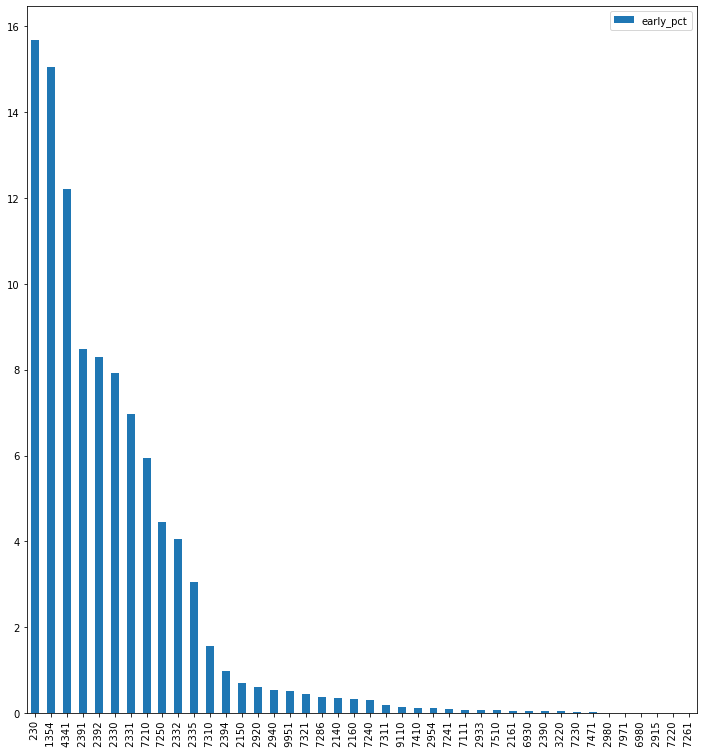

In [44]:
early_care_sumT.plot.bar(figsize = (12,13))

join data together

In [45]:
treatment_sum_joined = urgent_sumT.join([no_problem_sumT,early_care_sumT],how='outer')

In [46]:
treatment_sum_joined.head()

,Urgent_pct,no_problem_pct,early_pct
1354,15.440878,16.168675,15.052548
7210,15.400244,5.397590,5.949825
230,12.515238,14.939759,15.679738
4341,10.646079,11.277108,12.216070
7250,9.548964,4.746988,4.463781


<AxesSubplot:>

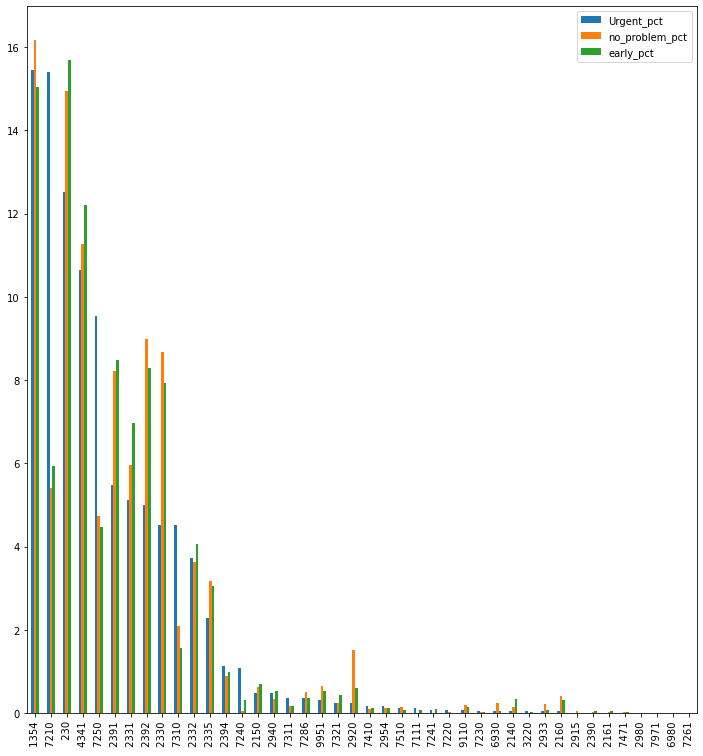

In [47]:
treatment_sum_joined.plot.bar(figsize = (12,13))

what are the most prevalent procedures by subgroup
-

In [48]:
treatment_joined_limit = treatment_sum_joined[:21]

<AxesSubplot:>

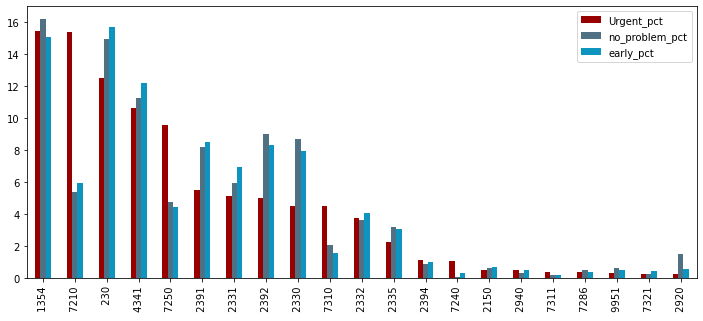

In [49]:
colors_list = ['#980000','#507184','#0D94BF']
treatment_joined_limit.plot.bar(color=colors_list,figsize = (12,5))

Do procedures correlate with incomplete treatment plans?
-

select pertinent data from each subgroups

In [50]:
urgent_grouped.head()

,CallReportNum_x,PostalCode,1351,1354,2140,2150,2160,2161,220,230,2330,2331,2332,2335,2390,2391,2392,2394,2915,2920,2933,2940,2954,2955,2980,3220,4341,6930,6980,7111,7210,7220,7230,7240,7241,7250,7261,7285,7286,7310,7311,7321,7410,7411,7412,7413,7414,7415,7440,7450,7451,7460,7461,7471,7510,7511,7970 - Mandibular Quantity,7970 - Maxillary Quantity,7971,7972,9110,9951,Denture Step Mandibular Quantity,Denture Step Maxillary Quantity,Is the treatment plan completed?,Was a treatment plan developed?,# of Lower Natural Teeth,# of Upper Natural Teeth,CallReportNum_y,not_created,created,not_completed,completed,not_restored,restored,incomplete
CallerNum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2384106,859604464,519820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,773696742,0,4,2,1,2,1,3
2385168,504248811,334170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,11.0,498174678,0,1,0,1,0,1,0
2386075,587503301,371380.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,555044020,0,2,0,1,0,1,1
2387627,504018763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,497883582,0,1,0,1,0,1,0
2390783,1394984052,779415.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,1161769539,1,9,3,4,4,5,5


In [51]:
urgent_grouped = urgent_grouped.drop(['CallReportNum_x',
                                               'PostalCode',
                                               ' Is the treatment plan completed?',
                                               ' Was a treatment plan developed?',
                                               ' # of Lower Natural Teeth',
                                               ' # of Upper Natural Teeth',
                                               'CallReportNum_y',
                                               'not_created','created','not_completed','completed',
                                               'not_restored','restored'],axis=1)

In [52]:
early_care_grouped = early_care_grouped.drop(['CallReportNum_x',
                                               'PostalCode',
                                               ' Is the treatment plan completed?',
                                               ' Was a treatment plan developed?',
                                               ' # of Lower Natural Teeth',
                                               ' # of Upper Natural Teeth',
                                               'CallReportNum_y',
                                               'not_created','created','not_completed','completed',
                                               'not_restored','restored'],axis=1)

In [53]:
no_problem_grouped = no_problem_grouped.drop(['CallReportNum_x',
                                               'PostalCode',
                                               ' Is the treatment plan completed?',
                                               ' Was a treatment plan developed?',
                                               ' # of Lower Natural Teeth',
                                               ' # of Upper Natural Teeth',
                                               'CallReportNum_y',
                                               'not_created','created','not_completed','completed',
                                               'not_restored','restored'],axis=1)

check for correlations with "incomplete" variable
-

urgent

In [54]:
m = pd.DataFrame(treatment_joined_limit.index)

In [55]:
urgent_corr = urgent_grouped.filter(m[0],axis=1)

In [56]:
urg_incomplete = pd.DataFrame(urgent_grouped['incomplete'])

In [57]:
urgent_corr = urgent_corr.merge(urg_incomplete,how='inner',on='CallerNum')

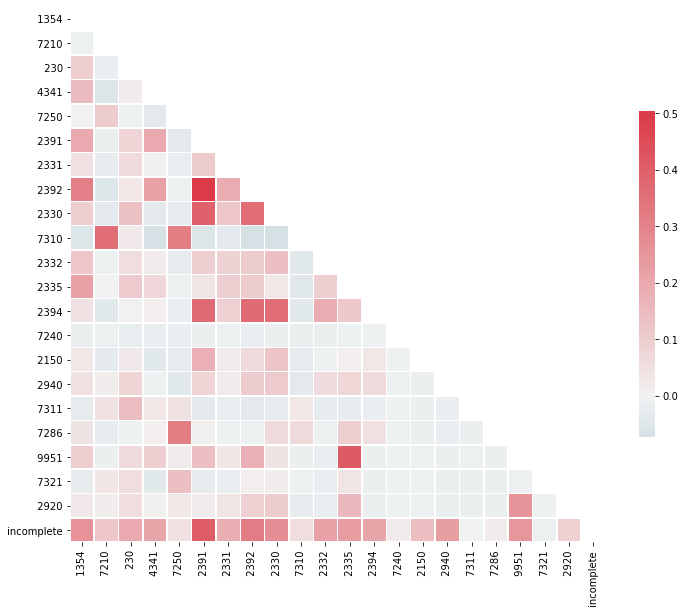

In [58]:
fig, ax = plt.subplots(figsize=(12, 12))

corr =urgent_corr.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

no_problem

In [59]:
np_corr = no_problem_grouped.filter(m[0],axis=1)

In [60]:
np_incomplete = pd.DataFrame(no_problem_grouped['incomplete'])

In [61]:
np_corr = np_corr.merge(np_incomplete,how='inner',on='CallerNum')

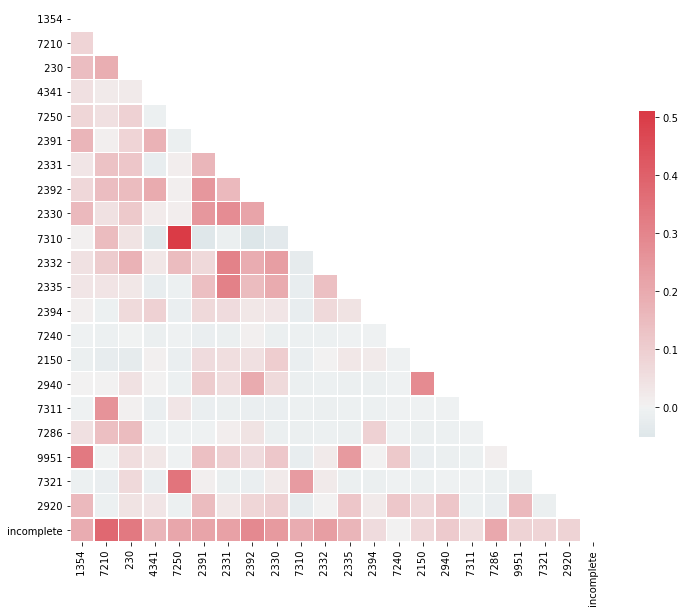

In [62]:
fig, ax = plt.subplots(figsize=(12, 12))

corr =np_corr.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

early_care

In [63]:
early_corr = early_care_grouped.filter(m[0],axis=1)

In [64]:
early_incomplete = pd.DataFrame(early_care_grouped['incomplete'])

In [65]:
early_corr = early_corr.merge(early_incomplete,how='inner',on='CallerNum')

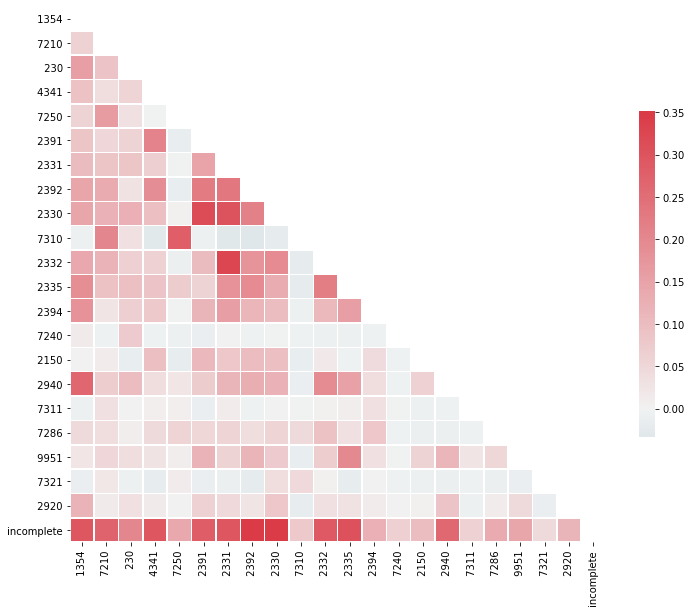

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))

corr =early_corr.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Find procedures that commonly result in a smile restored
-

examine relationship between procedures and restored smile
-

restored yes

In [73]:
df_restored_yes = df_clean.loc[df_clean['restored']==1]

In [76]:
restored_yes_slice = df_restored_yes.iloc[:,12:62]
restored_yes_slice.tail()

,1351,1354,2140,2150,2160,2161,220,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7285,7286,7310,7311,7320,7321,7410,7411,7412,7413,7414
57248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
57526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
57595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
57856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
57859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
restored_sum = restored_yes_slice.agg([sum])
restored_sumT = restored_sum.T
restored_sumT = restored_sumT.loc[restored_sumT['sum']>0]
restored_sumT = restored_sumT.sort_values(by='sum',ascending = False)
restored_sumT = restored_sumT.rename(columns={'sum':'restored_pct'})
restored_sumT['restored_pct'] = (restored_sumT['restored_pct']/restored_sumT['restored_pct'].sum())*100

<AxesSubplot:>

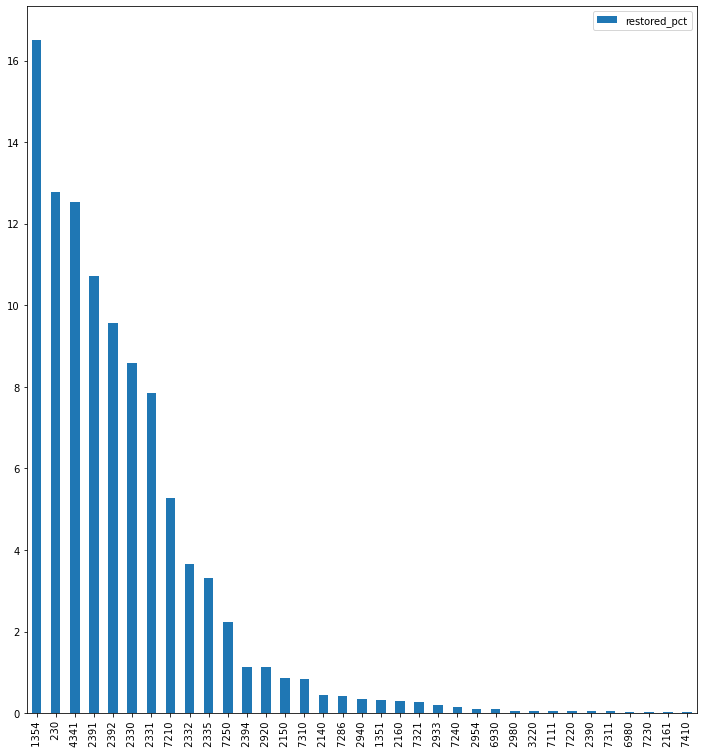

In [86]:
restored_sumT.plot.bar(figsize = (12,13))

restored no

In [87]:
df_restored_no = df_clean.loc[df_clean['not_restored']==1]

In [88]:
df_restored_no_slice = df_restored_no.iloc[:,12:62]

In [89]:
restored_no_sum = df_restored_no_slice.agg([sum])
restored_no_sumT = restored_no_sum.T
restored_no_sumT = restored_no_sumT.loc[restored_no_sumT['sum']>0]
restored_no_sumT = restored_no_sumT.sort_values(by='sum',ascending = False)
restored_no_sumT = restored_no_sumT.rename(columns={'sum':'restored_no_pct'})
restored_no_sumT['restored_no_pct'] = (restored_no_sumT['restored_no_pct']/restored_no_sumT['restored_no_pct'].sum())*100

<AxesSubplot:>

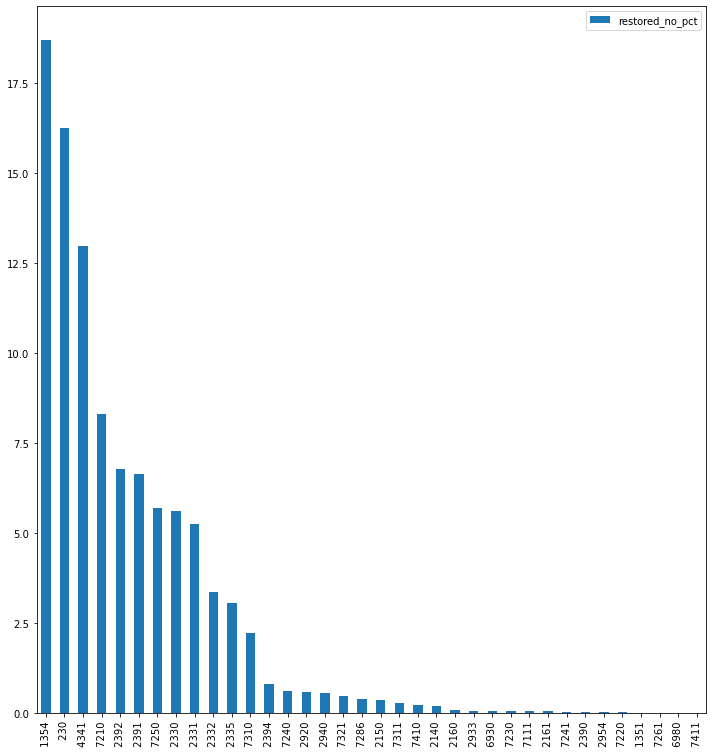

In [90]:
restored_no_sumT.plot.bar(figsize = (12,13))

apply to subgroups

In [ ]:
urgent_grouped = urgent_merged.groupby('CallerNum').agg('sum')